<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3.02: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

## Imports

In [1]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [2]:
# Read in the citibike data in the data folder in this repository.
citibike = pd.read_csv('./data/citibike_feb2014.csv')

In [3]:
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


## Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [4]:
citibike.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [5]:
citibike.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                  object
gender                       int64
dtype: object

In [6]:
citibike.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000
mean,874.519810,439.203479,40.734366,-73.990386,440.741995,40.734221,-73.990521,18010.598222,1.154617
std,5486.092219,335.723861,0.019031,0.011853,341.497433,0.019048,0.011920,1987.769335,0.436592
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000
25%,360.000000,305.000000,40.721854,-73.998522,305.000000,40.721816,-73.999061,16302.000000,1.000000
50%,544.000000,403.000000,40.736197,-73.990617,403.000000,40.735877,-73.990741,17975.000000,1.000000
75%,845.000000,490.000000,40.749156,-73.981918,488.000000,40.749013,-73.981948,19689.000000,1.000000
max,766108.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21542.000000,2.000000


## Is average trip duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!

In [7]:
men = citibike[citibike['gender']==1]['tripduration']
women = citibike[citibike['gender']==2]['tripduration']

ret = ttest_ind(men,women)

In [8]:
type(ret)

scipy.stats.stats.Ttest_indResult

In [9]:
ret.pvalue

3.046762685660303e-09

## What numeric columns shouldn't be treated as numeric?

**Answer:** Station ID, Bike ID, and Gender shouldn't be treated as numeric

## Dummify the `start station id` Variable

In [10]:
citibike.shape

(224736, 15)

In [72]:
pd.get_dummies(citibike,
              columns = ['start station id'],
               drop_first=True).head()

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2006,start station id_2008,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,0,0
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,0
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,0,0
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,0,0,0,0,0,0,0,0,0,0
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,0


In [12]:
citibike.shape

(224736, 15)

In [13]:
citibike.columns[:30]

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

## Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data a bit.

In [14]:
citibike['birth year'].dtypes

dtype('O')

In [15]:
for i in set(citibike['birth year']):
    try:
        _ = int(i)
    except:
        print(i)

\N


In [16]:
(citibike['birth year'] == '\\N').sum()

6717

In [17]:
citibike = citibike[citibike['birth year'] != '\\N']

In [18]:
citibike['birth year'] = citibike['birth year'].map(lambda x:int(x))

In [19]:
citibike['birth year'].dtypes

dtype('int64')

In [20]:
citibike['age'] = citibike['birth year'].map(lambda x: 2014 - x)

In [21]:
citibike['age'].min(), citibike['age'].max()

(17, 115)

## Split your data into train/test data

Look at the size of your data. What is a good proportion for your split? **Justify your answer.**

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`. (Hint: You may find the Pandas `.drop()` method helpful here.)

**NOTE:** When doing your train/test split, please use random seed 123.

In [22]:
df = pd.get_dummies(citibike,columns=['usertype'],drop_first=True)

In [23]:
df.shape

(218019, 15)

In [24]:
temp = df.dropna()

In [25]:
[e for e in citibike.columns if 'user' in e]

['usertype']

In [26]:
citibike['usertype'].value_counts()

Subscriber    218019
Name: usertype, dtype: int64

In [27]:
list(df.columns)

['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'birth year',
 'gender',
 'age']

In [28]:
drop_em =['tripduration',
 'starttime',
 'stoptime',
 'start station id',
 'start station name',
 'start station latitude',
 'start station longitude',
 'end station id',
 'end station name',
 'end station latitude',
 'end station longitude',
 'bikeid',
 'birth year']

In [29]:
X = df.drop(columns = drop_em)

In [30]:
y = df['tripduration']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 123)

In [32]:
x_train.shape

(174415, 2)

In [74]:
train_test_split(X,y,random_state=2)

[        gender  age
 102671       1   35
 10296        2   29
 54653        1   25
 172173       1   21
 74385        1   39
 ...        ...  ...
 181787       1   60
 98247        2   49
 209791       1   53
 103458       1   39
 91597        1   23
 
 [163514 rows x 2 columns],         gender  age
 161305       1   23
 142782       1   22
 77071        0   63
 179692       1   37
 111030       1   49
 ...        ...  ...
 170555       1   36
 108872       1   33
 92187        1   60
 62369        2   35
 208504       2   38
 
 [54505 rows x 2 columns], 102671     585
 10296      395
 54653      967
 172173     383
 74385      556
           ... 
 181787    1093
 98247      499
 209791     484
 103458    1412
 91597      468
 Name: tripduration, Length: 163514, dtype: int64, 161305    2661
 142782     436
 77071      513
 179692     332
 111030     603
           ... 
 170555     567
 108872     535
 92187      735
 62369      792
 208504     303
 Name: tripduration, Length: 54505, d

## Fit a Linear Regression model in `sklearn` predicting `tripduration`.

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
yhat_test = model.predict(x_test)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1e4e02d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1e4e0750>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c222ae610>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1e517190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1e517690>],
 'means': []}

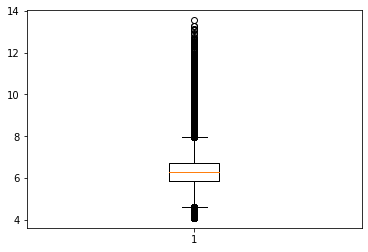

In [53]:
plt.boxplot(np.log(y_train))

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

In [55]:
r2_score(y_train,model.predict(x_train))

0.00023454512883858136

In [56]:
r2_score(y_test,yhat_test)

0.00019010642389283294

A: The model is underfit because the coefficient of determination for the train model is below zero. The model outperforms the baseline by a small percentage.

## Fit a Linear Regression model in `statsmodels` predicting `tripduration`.

In [57]:
x_train = sm.add_constant(x_train)

/Users/tringuyen/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [58]:
model_sm = sm.OLS(y_train,x_train).fit()

In [64]:
from io import StringIO

In [65]:
coef_table.as_csv()

'      ,   coef   , std err ,    t    ,P>|t| ,  [0.025 ,  0.975] \nconst ,  457.7926,   65.488,    6.991, 0.000,  329.438,  586.147\ngender,  181.8183,   35.240,    5.159, 0.000,  112.748,  250.888\nage   ,    4.8361,    1.211,    3.994, 0.000,    2.463,    7.210'

## Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `tripduration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!

In [67]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     20.46
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           1.31e-09
Time:                        16:21:00   Log-Likelihood:            -1.7581e+06
No. Observations:              174415   AIC:                         3.516e+06
Df Residuals:                  174412   BIC:                         3.516e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        457.7926     65.488      6.991      0.000     329.438     586.147
gender       181.8183     35.240      5.159      0.000     112.748     250.888
age            4.8361      1.211      3.994      0.000       2.463       7.210
==============================================================================
Omnibus:                   587341.566   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     191192599314.598
Skew:                          60.840   Prob(JB):                         0.00
Kurtosis:                    5130.752   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
ret = model_sm.summary()

In [69]:
coef_table = ret.tables[1]

In [70]:
coef_table

,coef,std err,t,P>|t|,[0.025,0.975]
const,457.7926,65.488,6.991,0.000,329.438,586.147
gender,181.8183,35.240,5.159,0.000,112.748,250.888
age,4.8361,1.211,3.994,0.000,2.463,7.210


In [71]:
(pd.DataFrame(model_sm.pvalues)[0]<0.05).sum()

3

A: Because our p-value was below 0.05, we reject the null hypothesis and conclude that the mean housing prices between the treatment and control group differs.

## Citi Bike is attempting to market to people who they think will ride their bike for a long time. Based on your modeling, what types of individuals should Citi Bike market toward?

Citi Bike should market towards gender because the coefficient is closer to the constant than the age group.